# Lab 5: Matrix multiplication, inverses, numerical instability
     
MTH 308: Applied Linear Algebra <br>
Fall 2021

Lab parts: 
- Part 1: Matrix multiplication via for loops, Exercise 1
- Part 2: Matrix inverses by Gaussian Elimination, Exercise 2
- Part 3: Machine error and numerical instability, Exercise 3

## Instructions

Run each of the coding cells. For example cells, understand the commands and check that the outputs make sense. For exercise cells, write your own code where indicated to generate the correct output.

<u>Submission:</u> Complete the following notebook in order. Once done, print the notebook and save as an HTML file. Upload your submission to the Canvas course page.

<u>Rubric:</u> 15 total points, 3 points to running example cells and saving outputs, 4 points per exercise block with correct output saved.

<u>Deadline:</u> Monday at midnight after the lab is assigned.

## Part 1: Matrix multiplication via for loops, Exercise 1

Here we code the calculation of $AB$ by
- Building a custom function with nested for loops
- Using built-in commands

#### Explanation

Recall from class one of the methods for computing $AB=C$ as
$$
c_{ij} = \sum_{k=1}^n a_{ik} b_{kj}
$$
where $c_{ij}$ is the entry in row $i$ and column $j$ of matrix $C$. Note we need dimension of $A$ as $(m \times n)$ and dimension of $B$ as $(n \times p)$ for this multiplication to be compatible and the resulting matrix $C$ ends up having dimentions $(m \times p)$.

#### Example

The below matrices $A$ and $B$ are compatible for multiplying since the number of columns of $A$ matches the number of rows of $B$.
$$
A = \left[
\begin{array}{ccc}
3 & 1 & 4 \\
1 & 5 & 9
\end{array}
\right], \quad 
B = \left[
\begin{array}{cc}
2 & 7  \\
1 & 8 \\
2 & 8
\end{array}
\right]
$$
The resulting product $C=AB$ is of dimension $(2 \times 2)$. If we want entry $c_{22}$ of $C$, we compute as
$$
c_{22} = a_{21}b_{12} + a_{22}b_{22} + a_{23}b_{32} = 1(7) + 5(8) + 9(8) = 119.
$$

#### Exercise 1: Matrix multiplication

For the above matrices $A$ and $B$, compute the product $C=AB$ by using nested for loops.

In [1]:
##################
# EXERCISE CELL
##################

library(matlib)

# given matrices A and B
A <- matrix(c(3, 1, 4,
              1, 5, 9), nrow=2, ncol=3, byrow=TRUE)
B <- matrix(c(2, 7,
              1, 8,
              2, 8), nrow=3, ncol=2, byrow=TRUE)

# resulting produce C
C <- matrix(0, nrow=2, ncol=2, byrow=TRUE)

# nested for loop to compute C=AB
for (i in c(1:2)){
    for (j in c(1:2)){
        C[i,j] <- 0
        for (k in c(1:3)){
            ##########################
            # beginning of your code
            
            C[i,j] <- C[i,j] + A[i,k]*B[k,j]
            
            # end of your code
            ##########################
        }
    }
}

print("Your calculuation:")
print(C)
print("R routine check of work:")
print(A %*% B)

Warning message in rgl.init(initValue, onlyNULL):
“RGL: unable to open X11 display”


Warning message:
“'rgl.init' failed, running with 'rgl.useNULL = TRUE'.”


[1] "Your calculuation:"


     [,1] [,2]
[1,]   15   61
[2,]   25  119


[1] "R routine check of work:"


     [,1] [,2]
[1,]   15   61
[2,]   25  119


Create a general function which has inputs of matrices $A$ and $B$ and outputs new matrix $C$ where $C=AB$. This function should produce an error message if $A$ and $B$ are not compatible. Test your functions for $A$ and $B$ above as well as 2 random examples by comparing to the built in $A \%*\% B$ command.

In [2]:
##################
# EXERCISE CELL
##################

##########################
# beginning of your code

matmult <- function(A,B){
    
    if (ncol(A) != nrow(B)){
        return("ERROR: Matrix multiplication not compatible! You are crazy.")
    }

    # resulting product C
    C <- matrix(0, nrow=nrow(A), ncol=ncol(B), byrow=TRUE)

    # nested for loop to compute C=AB
    for (i in c(1:nrow(A))){
        for (j in c(1:ncol(B))){
            C[i,j] <- 0
            for (k in c(1:ncol(A))){
                ##########################
                # beginning of your code

                C[i,j] <- C[i,j] + A[i,k]*B[k,j]

                # end of your code
                ##########################
            }
        }
    }
    return(C)
}

# example 1
# given matrices A and B
A <- matrix(c(3, 1, 4,
              1, 5, 9), nrow=2, ncol=3, byrow=TRUE)
B <- matrix(c(2, 7,
              1, 8,
              2, 8), nrow=3, ncol=2, byrow=TRUE)

print("EXAMPLE 1")
print("My calculuation:")
print(matmult(A,B))
print("R routine check of work:")
print(A %*% B)


# example 2
# given matrices A and B
A <- matrix(sample.int(100, size = 4*4, replace = TRUE), nrow = 4, ncol = 4)
B <- matrix(sample.int(100, size = 4*5, replace = TRUE), nrow = 4, ncol = 5)

print("EXAMPLE 2")
print("My calculuation:")
print(matmult(A,B))
print("R routine check of work:")
print(A %*% B)


# example 2
# given matrices A and B
A <- matrix(sample.int(100, size = 4*5, replace = TRUE), nrow = 4, ncol = 5)
B <- matrix(sample.int(100, size = 4*5, replace = TRUE), nrow = 4, ncol = 5)

print("EXAMPLE 3, incompatible dimensions")
print("My calculuation:")
print(matmult(A,B))
print("R routine check of work:")
print(A %*% B)

# end of your code
##########################


[1] "EXAMPLE 1"


[1] "My calculuation:"


     [,1] [,2]
[1,]   15   61
[2,]   25  119


[1] "R routine check of work:"


     [,1] [,2]
[1,]   15   61
[2,]   25  119


[1] "EXAMPLE 2"


[1] "My calculuation:"


      [,1]  [,2] [,3]  [,4]  [,5]
[1,] 11348  6242 4294 13044  6173
[2,]  9898  9427 4847 13961  9182
[3,]  5092  6478 2448  7762  6015
[4,] 13045 13780 6170 19176 12349


[1] "R routine check of work:"


      [,1]  [,2] [,3]  [,4]  [,5]
[1,] 11348  6242 4294 13044  6173
[2,]  9898  9427 4847 13961  9182
[3,]  5092  6478 2448  7762  6015
[4,] 13045 13780 6170 19176 12349


[1] "EXAMPLE 3, incompatible dimensions"


[1] "My calculuation:"


[1] "ERROR: Matrix multiplication not compatible! You are crazy."


[1] "R routine check of work:"


ERROR: Error in A %*% B: non-conformable arguments


## Part 2: Matrix inverses by Gaussian Elimination, Exercise 2

Here we compute the inverse of a matrix by solving a set of linear systems. 

#### Explanation

Recall the inverse of square matrix $A$, written $A^{-1}$, is defined as the matrix such that
$$
A A^{-1} = A^{-1} A = I.
$$
We can compute the $i$th column of $A^{-1}$ by solving the linear system
$$
A \vec{x} = \vec{e}_i
$$
for $\vec{e}_i$ the $i$th unit basis vector.

#### Example

For $(2\times 2)$ matrix
$$
A = \left[
\begin{array}{cc}
1 & 2 \\
3 & 4
\end{array}
\right]
$$
we need to solve
$$
\left[
\begin{array}{cc}
1 & 2 \\
3 & 4
\end{array}
\right] \vec{x} = \left[
\begin{array}{c}
1 \\ 0
\end{array}
\right], \quad \text{and} \quad \left[
\begin{array}{cc}
1 & 2 \\
3 & 4
\end{array}
\right] \vec{x} = \left[
\begin{array}{c}
0 \\ 1
\end{array} \right]
$$
as is done in the below code.

In [3]:
##################
# EXAMPLE CELL
# you do not need to code anything here
##################

A <- matrix(c(1, 2,
              3, 4), nrow=2, ncol=2, byrow=TRUE)
Ainv <- matrix(0, nrow=2, ncol=2) # inverse matrix to compute

# compute the first column of A^{-1}
e1 <- rep(0,2)
e1[1] <- 1
x <- solve(A,e1)
Ainv[,1] <- x

# compute the second column of A^{-1}
e2 <- rep(0,2)
e2[2] <- 1
x <- solve(A,e2)
Ainv[,2] <- x

print("Computed A inverse")
print(Ainv) 
print("Check the product A^{-1} * A")
print(Ainv %*% A) # note there is computer roundoff error here since out machine can only get ~15 digits accuracy
print("Check the product A * A^{-1}")
print(A %*% Ainv) # check that we get the identity matrix
print("Package inverse function")
print(inv(A)) # check via matlib package function

[1] "Computed A inverse"


     [,1] [,2]
[1,] -2.0  1.0
[2,]  1.5 -0.5


[1] "Check the product A^{-1} * A"


              [,1]         [,2]
[1,]  1.000000e+00 4.440892e-16
[2,] -5.551115e-17 1.000000e+00


[1] "Check the product A * A^{-1}"


     [,1]         [,2]
[1,]    1 1.110223e-16
[2,]    0 1.000000e+00


[1] "Package inverse function"


     [,1] [,2]
[1,] -2.0  1.0
[2,]  1.5 -0.5


#### Exercise 2: Matrix inverses

Write a general function which takes a matrix $A$ as input and returns the inverse of $A$ as a result. Your function should check if the matrix is square and return an error if it isn't. Test your function for matrix $A$ above as well as 2 random examples. 

In [4]:
##################
# EXERCISE CELL
##################

##########################
# beginning of your code


invFunc <- function(A){
    
    if (nrow(A) != ncol(A)){
        return("ERROR: Matrix must be square to be invertible. You are crazy!")
    }

    Ainv <- matrix(0, nrow=nrow(A), ncol=ncol(A)) # inverse matrix to compute
    ident <- diag(1, nrow(A))
    
    for (i in c(1:nrow(A))){
        # compute the ith column of A^{-1}
        ei <- ident[,i]
        x <- solve(A,ei)
        Ainv[,i] <- x
    }
    
    return(Ainv)
}



# example 1
A <- matrix(c(1, 2,
              3, 4), nrow=2, ncol=2, byrow=TRUE)

print("EXAMPLE 1")
print("Computed A inverse")
Ainv <- invFunc(A)
print(Ainv) 
print("Check the product A^{-1} * A")
print(Ainv %*% A) # note there is computer roundoff error here since out machine can only get ~15 digits accuracy
print("Check the product A * A^{-1}")
print(A %*% Ainv) # check that we get the identity matrix
print("Package inverse function")
print(inv(A)) # check via matlib package function


# example 2
A <- matrix(sample.int(100, size = 5*5, replace = TRUE), nrow = 5, ncol = 5)

print("EXAMPLE 2")
print("Computed A inverse")
Ainv <- invFunc(A)
print(Ainv) 
print("Check the product A^{-1} * A")
print(Ainv %*% A) # note there is computer roundoff error here since out machine can only get ~15 digits accuracy
print("Check the product A * A^{-1}")
print(A %*% Ainv) # check that we get the identity matrix
print("Package inverse function")
print(inv(A)) # check via matlib package function


# example 3
A <- matrix(sample.int(100, size = 5*6, replace = TRUE), nrow = 5, ncol = 6)

print("EXAMPLE 3: Not a square matrix")
print("Computed A inverse")
Ainv <- invFunc(A)
print("Package inverse function")
print(inv(A)) # check via matlib package function

# end of your code
##########################


[1] "EXAMPLE 1"


[1] "Computed A inverse"


     [,1] [,2]
[1,] -2.0  1.0
[2,]  1.5 -0.5


[1] "Check the product A^{-1} * A"


              [,1]         [,2]
[1,]  1.000000e+00 4.440892e-16
[2,] -5.551115e-17 1.000000e+00


[1] "Check the product A * A^{-1}"


     [,1]         [,2]
[1,]    1 1.110223e-16
[2,]    0 1.000000e+00


[1] "Package inverse function"


     [,1] [,2]
[1,] -2.0  1.0
[2,]  1.5 -0.5


[1] "EXAMPLE 2"


[1] "Computed A inverse"


             [,1]         [,2]         [,3]          [,4]        [,5]
[1,]  0.016441842  0.005770571  0.004744577 -0.0007637415 -0.01330415
[2,]  0.018651872  0.097403269 -0.007193404  0.0439627690 -0.11176754
[3,] -0.016894026  0.025310470  0.012497613  0.0347432218 -0.03937619
[4,] -0.002906376 -0.029035002 -0.003209635 -0.0080188094  0.03773045
[5,] -0.011232653 -0.087180448 -0.002661739 -0.0627895893  0.11999782


[1] "Check the product A^{-1} * A"


              [,1]          [,2]         [,3]          [,4]          [,5]
[1,]  1.000000e+00  6.765422e-16 1.106754e-15  1.887379e-15  7.424616e-16
[2,]  8.326673e-16  1.000000e+00 7.632783e-16 -1.332268e-15  1.859624e-15
[3,] -2.498002e-16 -1.422473e-15 1.000000e+00 -1.554312e-15 -9.575674e-16
[4,] -3.885781e-16 -9.714451e-17 1.804112e-16  1.000000e+00  2.775558e-17
[5,]  2.220446e-16  7.216450e-16 9.436896e-16  0.000000e+00  1.000000e+00


[1] "Check the product A * A^{-1}"


              [,1]          [,2]          [,3]          [,4]          [,5]
[1,]  1.000000e+00 -2.081668e-16  1.595946e-16  6.800116e-16  6.106227e-16
[2,] -2.636780e-16  1.000000e+00  6.245005e-17 -5.134781e-16  1.609823e-15
[3,] -8.326673e-17 -2.498002e-16  1.000000e+00  1.942890e-16  1.110223e-16
[4,] -1.387779e-17  2.775558e-16 -1.214306e-17  1.000000e+00 -2.220446e-16
[5,]  1.387779e-16  9.714451e-16 -9.714451e-17 -3.608225e-16  1.000000e+00


[1] "Package inverse function"


            [,1]        [,2]        [,3]        [,4]        [,5]
[1,]  0.01644184  0.00577057  0.00474458 -0.00076374 -0.01330415
[2,]  0.01865187  0.09740327 -0.00719340  0.04396277 -0.11176754
[3,] -0.01689403  0.02531047  0.01249761  0.03474322 -0.03937619
[4,] -0.00290638 -0.02903500 -0.00320964 -0.00801881  0.03773045
[5,] -0.01123265 -0.08718045 -0.00266174 -0.06278959  0.11999782


[1] "EXAMPLE 3: Not a square matrix"


[1] "Computed A inverse"


[1] "Package inverse function"


ERROR: Error in Inverse(X, tol = sqrt(.Machine$double.eps), ...): X must be a square numeric matrix


## Part 3: Machine error and numerical instability, Exercise 3

Here you will explore machine roundoff error through the famous example of a Hilbert matrix.

#### Exercise 3: Hilbert Matrix

See the following link for an definition of a Hilbert matrix: https://en.wikipedia.org/wiki/Hilbert_matrix

Create a function which inputs a positive integer $n$ and outputs the $(n\times n)$ Hilbert matrix $H$.
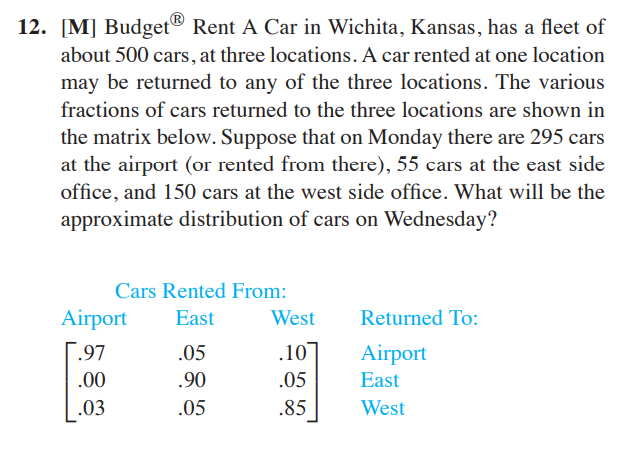

In [5]:
##################
# EXERCISE CELL
##################

##########################
# beginning of your code

hilbertMat <- function(n){
    H <- matrix(0,nrow=n,ncol=n)
    
    for (i in c(1:n)){
        for (j in c(1:n)){
            H[i,j] <- 1/(i+j-1)
        }
    }
    
    return(H)
}

print(hilbertMat(5))

# end of your code
##########################

          [,1]      [,2]      [,3]      [,4]      [,5]
[1,] 1.0000000 0.5000000 0.3333333 0.2500000 0.2000000
[2,] 0.5000000 0.3333333 0.2500000 0.2000000 0.1666667
[3,] 0.3333333 0.2500000 0.2000000 0.1666667 0.1428571
[4,] 0.2500000 0.2000000 0.1666667 0.1428571 0.1250000
[5,] 0.2000000 0.1666667 0.1428571 0.1250000 0.1111111


Using the above Hilbert matrix function, perform the following experiment for $n=5, 10, 20, 50$.
- Solve the system $H\vec{x}=\vec{b}$ for $\vec{x}$ where $\vec{b}$ is a vector of all ones. Use the $solve(H,x,tol=1e-100)$ command from the $matlib$ library.
- Verify your solution is correct by computing $H\vec{x}$ using your above matrix multiplication function. Also check using the built in $\% * \%$ function.
- Find the inverse of $H$ using your above matrix inverse function.
- Verify your inverse function is correct by computing $H* H^{-1}$ using your above matrix multiplication function. Also check using the built in $\% * \%$ function. Also try out the $Inverse(H, tol=1e-100)$ function from the $matlib$ library.

In [6]:
##################
# EXERCISE CELL
##################

##########################
# beginning of your code

library(matlib)

nvals <- c(5,10,20,50)

for (n in nvals){
    H <- hilbertMat(n)
    b <- rep(1,n)
    
    print("####################")
    print(paste("n-value = ", n))
    print("Solution check to Hx=b")
    x <- solve(H,b,tol=1e-100)
    print(H %*% x)
    print("Inverse check")
    print(H %*% Inverse(H,tol=1e-100))
}

# end of your code
##########################

[1] "####################"
[1] "n-value =  5"
[1] "Solution check to Hx=b"
     [,1]
[1,]    1
[2,]    1
[3,]    1
[4,]    1
[5,]    1
[1] "Inverse check"
             [,1]          [,2]         [,3]          [,4]         [,5]
[1,] 1.000000e+00 -1.776979e-12 7.905454e-12 -3.162004e-12 4.127587e-12
[2,] 2.732999e-14  1.000000e+00 5.538718e-12  1.422344e-12 3.836302e-12
[3,] 4.372693e-14 -8.095746e-13 1.000000e+00 -3.399820e-13 3.028403e-12
[4,] 1.421085e-14 -9.094947e-13 4.547474e-12  1.000000e+00 1.818989e-12
[5,] 2.769390e-14 -5.791417e-13 3.692478e-12 -2.083420e-12 1.000000e+00
[1] "####################"
[1] "n-value =  10"
[1] "Solution check to Hx=b"
      [,1]
 [1,]    1
 [2,]    1
 [3,]    1
 [4,]    1
 [5,]    1
 [6,]    1
 [7,]    1
 [8,]    1
 [9,]    1
[10,]    1
[1] "Inverse check"
               [,1]          [,2]          [,3]          [,4]          [,5]
 [1,]  1.000000e+00 -5.690801e-08  9.971664e-07 -1.607003e-05  6.343425e-05
 [2,]  2.728329e-10  1.000000e+00  2.581877e

### Exercise 3: EXPLAIN YOUR FINDINGS HERE

The Hilbert matrix is well behaved for solving the linear systems, but the inverse of the Hilbert matrix is wildly incorrect.